In [1]:
%load_ext autoreload
%autoreload 2

import crispr as cr
from crispr.class_sc import Omics
import pertpy as pt
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

file_path = pt.dt.haber_2017_regions()  # download data

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analyze_causal_network', 'analyze_composition', 'analyze_receptor_ligand', 'calculate_dea_deseq2', 'cluster', 'clustering', 'communication', 'composition', 'compute_distance', 'find_marker_genes', 'perform_augur', 'perform_celltypist', 'perform_dea', 'perform_differential_prioritization', 'perform_gsea', 'perform_mixscape', 'perform_pathway_interference', 'perturbations']


Output()

UMAP Keywords: {'min_dist': 0.3}




# Single-Cell Omics Object Initialization

In [5]:
self = Omics(file_path, col_gene_symbols="index", col_cell_type="cell_label", 
             col_sample_id="batch", col_batch="batch", 
             col_condition="condition", key_control="Control", 
             key_treatment="Salmonella")



<<< INITIALIZING OMICS CLASS OBJECT >>>

Unused keyword arguments: {'col_batch': 'batch'}.

col_gene_symbols="index"
col_cell_type="cell_label"
col_sample_id="batch"
col_batch="batch"
col_subject=None
col_condition="condition"
col_num_umis=None
key_control="Control"
key_treatment="Salmonella"


<<< LOADING OBJECT >>>


Cell Counts: Initial

9842


Gene Counts: Initial



 AnnData object with n_obs × n_vars = 9842 × 15215
    obs: 'batch', 'barcode', 'condition', 'cell_label'
    layers: 'counts'


 AnnData object with n_obs × n_vars = 9842 × 15215
    obs: 'batch', 'barcode', 'condition', 'cell_label'
    layers: 'counts'
Empty DataFrame
Columns: []
Index: [A130010J15Rik, A130014A01Rik, A130051J06Rik, A130057D12Rik, A1cf]
                                                batch         barcode  \
index                                                                   
B1_AAACATACCACAAC_Control_Enterocyte.Progenitor    B1  AAACATACCACAAC   
B1_AAACGCACGAGGAC_Control_Stem                 

# Composition Analysis


Un-used Keyword Arguments: {'col_gene_symbols': 'index', 'col_batch': 'batch', 'col_subject': None, 'col_num_umis': None}
['condition']
MuData object with n_obs × n_vars = 9852 × 15223
  2 modalities
    rna:	9842 x 15215
      obs:	'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'
      layers:	'counts'
    coda:	10 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'
module 'pertpy.plot' has no attribute 'coda'

Failed to plot boxplots. Likely due to known Pertpy/ete3 issue.




Automatic reference selection! Reference cell type set to TA.Early

Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


MuData object with n_obs × n_vars = 9852 × 15223
  2 modalities
    rna:	9842 x 15215
      obs:	'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'
      layers:	'counts'
    coda:	10 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
[[ 36.  59. 136.  36. 239. 125. 191.  18.]
 [ 32. 373. 116.  67. 117.  65. 168.  12.]
 [  5.  46.  23.  20.  50.  11.  40.   5.]
 [ 45.  98. 188. 124. 250. 155. 365.  33.]
 [ 26. 221. 198.  36. 131. 130. 196.   4.]
 [ 52.  75. 347.  66. 323. 263. 313.  51.]
 [ 65. 126. 115.  33.  65.  39. 129.  59.]
 [ 42.  71. 203. 147. 271. 109. 180. 146.]
 [ 40.  57. 383. 170. 321. 244. 256.  71.]
 [ 37. 332. 113.  59.  90.  47. 132.  10.]]
                    condition batch
scCODA_sample_id                   
B1                    Control    B1
B10                Salmonella   B10
B2                    Control    B2
B3                    Control    B3
B4                    

sample: 100%|██████████| 11000/11000 [02:27<00:00, 74.61it/s, 255 steps of size 1.81e-02. acc. prob=0.85]


                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 10 samples, 8 cell types                                    │
│ Reference cell type                         │ TA.Early                                                          │
│ Formula                                     │ condition                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                        Final Parameter  Expected Sample                                                         │
│ Cell Type                                                                                                       │
│ Endocrine                  0.940            46.045                                                              │
│ Enterocyte                 1.879           117.756                                                              │
│ Enterocyte.Progenitor      2.320           183.023                                                              │
│ Goblet                     1.450            76.678                                                              │
│ Stem                       2.391           196.490                                                              │
│ TA                         1.853           114.734                                                              │
│ TA.Early                   2.486           216.072                                                              │
│ Tuft                       0.619            33.402                                                              │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                               Final Parameter  Expected Sample  log2-fold change                │
│ Covariate              Cell Type                                                                                │
│ conditionT.Hpoly.Day3  Endocrine                  0.000            46.045             0.000                     │
│                        Enterocyte                 0.000           117.756             0.000                     │
│                        Enterocyte.Progenitor      0.000           183.023             0.000                     │
│                        Goblet                     0.000            76.678             0.000                     │
│                        Stem                       0.000           196.490             0.000                     │
│                        TA                         0.000           114.734             0.000                     │
│                        TA.Early                   0.000           216.072             0.000                     │
│                        Tuft                       0.000            33.402             0.000                     │
│ conditionT.Hpoly.Day10 Endocrine                  0.000            46.045             0.000                     │
│                        Enterocyte                 0.000           117.756             0.000                     │
│                        Enterocyte.Progenitor      0.000           183.023             0.000                     │
│                        Goblet                     0.000            76.678             0.000                     │
│                        Stem                       0.000           196.490             0.000                     │
│                        TA                         0.000           114.734             0.000                     │
│                        TA.Early                   0.000           216.072             0.000                     │
│                        Tuft                       0.000            33.402             0.000                     │
│ conditionT.Salmonella  Endocrine                  0.000            32.174            -0.517                     │
│                        Enterocyte                 1.527           378.772             1.686                     │
│                        Enterocyte.Progenitor      0.000           127.888            -0.517                     │
│                        Goblet                     0.000            53.579            -0.517                     │
│                        Stem                       0.000           137.298            -0.517                     │
│                        TA                         0.000            80.170            -0.517                     │
│                        TA.Early                   0.000           150.981            -0.517                     │
│                        Tuft                       0.000            23.340            -0.517                     │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 10 samples, 8 cell types                                    │
│ Reference cell type                         │ TA.Early                                                          │
│ Formula                                     │ condition                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                        Final Parameter  Expected Sample                                                         │
│ Cell Type                                                                                                       │
│ Endocrine                  0.940            46.045                                                              │
│ Enterocyte                 1.879           117.756                                                              │
│ Enterocyte.Progenitor      2.320           183.023                                                              │
│ Goblet                     1.450            76.678                                                              │
│ Stem                       2.391           196.490                                                              │
│ TA                         1.853           114.734                                                              │
│ TA.Early                   2.486           216.072                                                              │
│ Tuft                       0.619            33.402                                                              │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                               Final Parameter  Expected Sample  log2-fold change                │
│ Covariate              Cell Type                                                                                │
│ conditionT.Hpoly.Day3  Endocrine                  0.000            46.045             0.000                     │
│                        Enterocyte                 0.000           117.756             0.000                     │
│                        Enterocyte.Progenitor      0.000           183.023             0.000                     │
│                        Goblet                     0.000            76.678             0.000                     │
│                        Stem                       0.000           196.490             0.000                     │
│                        TA                         0.000           114.734             0.000                     │
│                        TA.Early                   0.000           216.072             0.000                     │
│                        Tuft                       0.000            33.402             0.000                     │
│ conditionT.Hpoly.Day10 Endocrine                  0.000            46.045             0.000                     │
│                        Enterocyte                 0.000           117.756             0.000                     │
│                        Enterocyte.Progenitor      0.000           183.023             0.000                     │
│                        Goblet                     0.000            76.678             0.000                     │
│                        Stem                       0.000           196.490             0.000                     │
│                        TA                         0.000           114.734             0.000                     │
│                        TA.Early                   0.000           216.072             0.000                     │
│                        Tuft                       0.000            33.402             0.000                     │
│ conditionT.Salmonella  Endocrine                  0.000            32.174            -0.517                     │
│                        Enterocyte                 1.527           378.772             1.686                     │
│                        Enterocyte.Progenitor      0.000           127.888            -0.517                     │
│                        Goblet                     0.000            53.579            -0.517                     │
│                        Stem                       0.000           137.298            -0.517                     │
│                        TA                         0.000            80.170            -0.517                     │
│                        TA.Early                   0.000           150.981            -0.517                     │
│                        Tuft                       0.000            23.340            -0.517                     │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

module 'pertpy.plot' has no attribute 'coda'

Failed to plot stacked proportions.


module 'pertpy.plot' has no attribute 'coda'

Failed to plot effects.




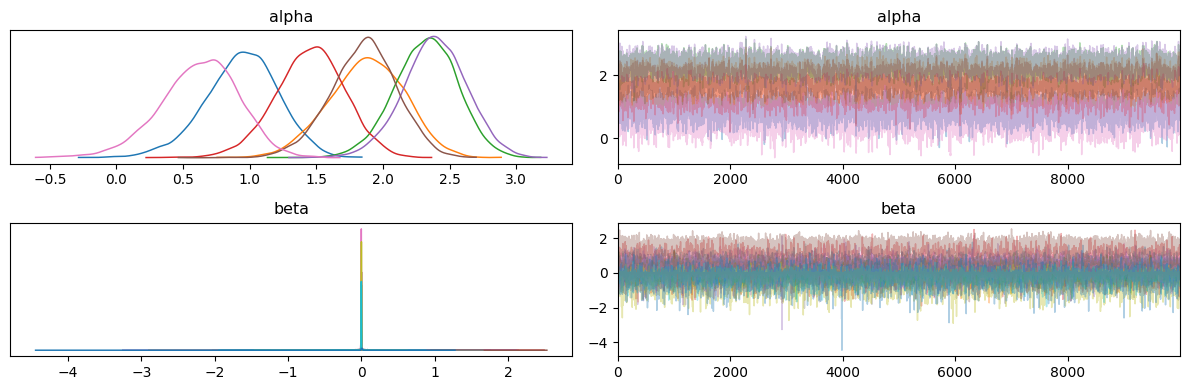

In [6]:
oca = self.run_composition_analysis(est_fdr=0.05, generate_sample_level=True)